In [2]:
#........................Project Title**** Airbnb Data Analysis And Build a Comprehensive Dashboard Using Tableau ****.................................
#import Useful libraries
import git
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [ ]:
#To Clone relevent data from github respiratory
#Specify the GitHub repository URL and local directory path
github_url = "https://github.com/neelabalan/mongodb-sample-dataset.git"
local_dir = "C:/Users/admin pc/Desktop/Airbnb_git"

 # Clone the repository to the specified local directorya
git.Repo.clone_from(github_url, local_dir)


In [4]:
data=pd.read_json(r"C:\Users\admin pc\Desktop\Airbnb_git\sample_airbnb\listingsAndReviews.json",lines=True)


In [5]:
data.head(3)

,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,guests_included,images,host,address,availability,review_scores,reviews,weekly_price,monthly_price,reviews_per_month
0,10006546,https://www.airbnb.com/rooms/10006546,Ribeira Charming Duplex,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Fantastic duplex apartment with three bedrooms...,"In the neighborhood of the river, you can find...",Lose yourself in the narrow streets and stairc...,Transport: • Metro station and S. Bento railwa...,We are always available to help guests. The ho...,...,{'$numberDecimal': '6'},"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51399391', 'host_url': 'https://w...","{'street': 'Porto, Porto, Portugal', 'suburb':...","{'availability_30': {'$numberInt': '28'}, 'ava...",{'review_scores_accuracy': {'$numberInt': '9'}...,"[{'_id': '58663741', 'date': {'$date': {'$numb...",NaN,NaN,NaN
1,10009999,https://www.airbnb.com/rooms/10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,One bedroom + sofa-bed in quiet and bucolic ne...,This charming ground floor flat is located in ...,"There´s a table in the living room now, that d...","Easy access to transport (bus, taxi, car) and ...",,...,{'$numberDecimal': '1'},"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '1282196', 'host_url': 'https://ww...","{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': {'$numberInt': '0'}, 'avai...",{},[],{'$numberDecimal': '1492.00'},{'$numberDecimal': '4849.00'},NaN
2,1001265,https://www.airbnb.com/rooms/1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,Great studio located on Ala Moana across the s...,A short distance from Honolulu's billion dolla...,You can breath ocean as well as aloha.,,Honolulu does have a very good air conditioned...,"Pool, hot tub and tennis",...,{'$numberDecimal': '1'},"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '5448114', 'host_url': 'https://ww...","{'street': 'Honolulu, HI, United States', 'sub...","{'availability_30': {'$numberInt': '16'}, 'ava...",{'review_scores_accuracy': {'$numberInt': '9'}...,"[{'_id': '4765259', 'date': {'$date': {'$numbe...",{'$numberDecimal': '650.00'},{'$numberDecimal': '2150.00'},NaN


In [6]:
#To get shape of dataframe(Number of rows and  columns
data.shape 

(5555, 42)

In [7]:
#To get features name
data.keys()

Index(['_id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'property_type', 'room_type', 'bed_type',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'guests_included', 'images', 'host', 'address',
       'availability', 'review_scores', 'reviews', 'weekly_price',
       'monthly_price', 'reviews_per_month'],
      dtype='object')

In [8]:
data_=data.copy()

#Data processing


In [9]:
#Some Data in dataframe are in dictionaries, so we need to Extract relevent data from dictionaries of dataframe records

In [10]:
#To get Price data
  
list1=[]
for item1 in data_['price'].values:
                price=item1["$numberDecimal"]
                list1.append(price)
data_['price']=list1
data_.price=data_.price.astype(str).astype(float)

In [11]:
#To get security_deposit
list2=[]
for item2 in data_["security_deposit"].values:
                                    if type(item2) is dict:
                                        security_deposit=item2["$numberDecimal"]
                                        security_deposit=float(security_deposit)
                                        list2.append(security_deposit)

                                    else:
                                            list2.append(item2)
data_["security_deposit"]=list2

In [12]:

#To get cleaning_fee
list3=[]
for item3 in data_["cleaning_fee"].values:
                            if type(item3) is dict:
                                        cleaning_fee=item3["$numberDecimal"]
                                        cleaning_fee=float(cleaning_fee)
                                        list3.append(cleaning_fee)

                            else:
                                            list3.append(item3)
data_["cleaning_fee"]=list3

In [13]:
#To get data about extra_people who can stay
list4=[]
for item4 in  data_["extra_people"].values:
                extra_people=item4["$numberDecimal"]
                extra_people=float(extra_people)
                list4.append(extra_people)
data_["extra_people"]=list4

In [14]:

#To get No of guests can included
list6=[]
for item6 in data_["guests_included"].values:
                    guests_included=item6["$numberDecimal"]
                    guests_included=int(guests_included)
                    list6.append(guests_included)
data_["guests_included"]=list6

In [15]:


#To get weekly_price
list7=[]
for item7 in data_["weekly_price"].values:
                            if type(item7) is dict:
                                        weekly_price=item7["$numberDecimal"]
                                        weekly_price=float(weekly_price)
                                        list7.append(weekly_price)

                            else:
                                            list7.append(item7)
data_["weekly_price"]=list7

In [16]:
#To get monthly_price
list8=[]
for item8 in data_["monthly_price"].values:
                            if type(item8) is dict:
                                        monthly_price=item8["$numberDecimal"]
                                        monthly_price=float(monthly_price)
                                        list8.append(monthly_price)

                            else:
                                            list8.append(item8)
data_["monthly_price"]=list8

In [17]:
#T get review_scores_rating
list9=[]
for item9 in data_["review_scores"].values:
                try:
                    review_scores=item9["review_scores_rating"]["$numberInt"]
                    review_scores=int(review_scores)
                    list9.append(review_scores)
                except:
                    list9.append(0)
data_["review_scores"]=list9


#To get number_of_reviews
list17=[]                
for item17 in data_.number_of_reviews.values: 
                    number_of_reviews=item17["$numberInt"]
                    list17.append(number_of_reviews)


data_["number_of_reviews"]=list17 

In [18]:
#To get No of bedrooms
list10=[]
for item10 in data_["bedrooms"].values:
                            if type(item10) is dict:
                                        bedrooms=item10["$numberInt"]
                                        bedrooms=int(bedrooms)
                                        list10.append(bedrooms)

                            else:
                                            list10.append(item10)
data_["bedrooms"]=list10

In [19]:

#To get No of beds
list11=[]
for item11 in data_["beds"].values:
                            if type(item11) is dict:
                                        beds=item11["$numberInt"]
                                        beds=int(beds)
                                        list11.append(beds)

                            else:
                                            list11.append(item11)
data_["beds"]=list11

In [20]:
#To get No of bathrooms
list12=[]
for item12 in data_["bathrooms"].values:
                            if type(item12) is dict:
                                        bathrooms=item12["$numberDecimal"]
                                        bathrooms=float(bathrooms)
                                        list12.append(bathrooms)

                            else:
                                            list12.append(item12)
data_["bathrooms"]=list12

In [21]:
#To get availability
list13=[]
for item13 in data_["availability"].values:
                availability=item13["availability_365"]["$numberInt"]
                availability=int(availability)
                list13.append(availability)
data_["availability"]=list13

In [22]:


#To get image of properties
list14=[]
for item14 in data_["images"].values:
                images=item14["picture_url"]
                list14.append(images)
data_["images"]=list14

In [23]:
#To get Street,Country,country_code,longitude,latitude
list_1,list_2,list__3,list_4,list_5,list_6,list_7=[],[],[],[],[],[],[]
for item15 in data_.address.values:
                    Street=item15["street"]
                    list_1.append(Street)

                    Country=item15["country"]
                    list_2.append(Country)

                    country_code=item15["country_code"]
                    list_4.append(country_code)
                    
                    is_location_exact=item15["location"]["is_location_exact"]
                    list__3.append(is_location_exact) 


                    longitude=item15["location"]["coordinates"][0]
                    try:          
                        list_5.append(float(longitude["$numberDouble"]))
                    except :
                                list_5.append( longitude["$numberInt"])


                    latitude=item15["location"]["coordinates"][1]          
                    list_6.append( float(latitude["$numberDouble"]))


                    market=item15["market"]
                    list_7.append(market)

data_["Street"]=list_1
data_["country"]=list_2
data_["is_location_exact"]=list__3
data_["country_code"]=list_4
data_["longitude"]=list_5
data_["latitude"]=list_6
data_["market"]=list_7

In [24]:
#To get host_location,host_id,host_identity_verified,host_name
l1,l2,l3,l4=[],[],[],[]
for item20 in data["host"].values:
                host_location=item20["host_location"]
                l1.append(host_location)
                
                host_identity_verified=item20["host_identity_verified"]
                l2.append(host_identity_verified)

                host_id=item20["host_id"]
                l3.append(host_id)

                

data_["host_location"]=l1
data_["host_identity_verified"]=l2
data_["host_id"]=l3 
     
list18_=[]
for item18_ in data.host.values: 

                host=item18_["host_name"]
                list18_.append(host)
data_["host_name"]=list18_

In [25]:


#To get accommodates
list19=[]                
for item19 in data_.accommodates.values: 
                    accommodates=item19["$numberInt"]
                    list19.append(accommodates)


data_["accommodates"]=list19

In [26]:
#to get amenities 
def amenities():
                list21=[]
                for item21 in data.amenities.values:
                        amenities=item21
                        list21.append(amenities)
                data_['amenities']=list21
                return  data_ 

In [27]:
#To show information about the data

data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     5555 non-null   int64  
 1   listing_url             5555 non-null   object 
 2   name                    5555 non-null   object 
 3   summary                 5555 non-null   object 
 4   space                   5555 non-null   object 
 5   description             5555 non-null   object 
 6   neighborhood_overview   5555 non-null   object 
 7   notes                   5555 non-null   object 
 8   transit                 5555 non-null   object 
 9   access                  5555 non-null   object 
 10  interaction             5555 non-null   object 
 11  house_rules             5555 non-null   object 
 12  property_type           5555 non-null   object 
 13  room_type               5555 non-null   object 
 14  bed_type                5555 non-null   

In [28]:
#To get statistical summary  for numerical columns in our DataFrame.

data_.describe()

,_id,minimum_nights,maximum_nights,bedrooms,beds,bathrooms,price,security_deposit,cleaning_fee,extra_people,guests_included,availability,review_scores,weekly_price,monthly_price,latitude
count,5.555000e+03,5555.000000,5.555000e+03,5550.000000,5542.000000,5545.000000,5555.000000,3471.000000,4024.000000,5555.000000,5555.000000,5555.000000,5555.000000,714.000000,656.000000,5555.000000
mean,1.664386e+07,5.564356,1.382776e+06,1.411712,2.071454,1.291163,278.766157,509.430424,94.074801,22.791899,1.747435,173.105671,68.395680,1530.903361,5391.370427,22.061230
std,9.622558e+06,22.613861,5.256920e+07,1.041942,1.619660,0.702265,842.215531,1594.805320,110.203782,69.331511,1.487352,139.841893,41.829834,3185.916331,12723.569651,28.092112
min,1.170800e+04,1.000000,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,60.000000,250.000000,-34.088290
25%,8.376039e+06,1.000000,5.900000e+01,1.000000,1.000000,1.000000,70.000000,0.000000,23.000000,0.000000,1.000000,17.000000,0.000000,480.250000,1505.250000,20.724390
50%,1.711345e+07,2.000000,1.125000e+03,1.000000,2.000000,1.000000,129.000000,200.000000,60.000000,0.000000,1.000000,171.000000,92.000000,800.000000,2800.000000,40.727130
75%,2.461229e+07,3.000000,1.125000e+03,2.000000,3.000000,1.000000,280.000000,500.000000,129.000000,20.000000,2.000000,317.000000,98.000000,1575.250000,4800.000000,41.162755
max,3.295874e+07,1250.000000,2.147484e+09,20.000000,25.000000,16.000000,48842.000000,39228.000000,2000.000000,2346.000000,16.000000,365.000000,100.000000,59123.000000,253384.000000,45.665630


In [29]:
#Now let's check Missing data
data_.isnull().sum()

_id                          0
listing_url                  0
name                         0
summary                      0
space                        0
description                  0
neighborhood_overview        0
notes                        0
transit                      0
access                       0
interaction                  0
house_rules                  0
property_type                0
room_type                    0
bed_type                     0
minimum_nights               0
maximum_nights               0
cancellation_policy          0
last_scraped                 0
calendar_last_scraped        0
first_review              1388
last_review               1388
accommodates                 0
bedrooms                     5
beds                        13
number_of_reviews            0
bathrooms                   10
amenities                    0
price                        0
security_deposit          2084
cleaning_fee              1531
extra_people                 0
guests_i

In [30]:
#Now have to fill the missing data

In [31]:
def missing_handling():
    data_.fillna(data_["bedrooms"].mode(),inplace=True)
    data_.fillna(data_["beds"].mode(),inplace=True)
    data_.fillna(data_["bathrooms"].mode(),inplace=True)
    data_.fillna(data_["security_deposit"].median(),inplace=True)
    data_.fillna(data_["cleaning_fee"].median(),inplace=True)
    data_.fillna(data_["weekly_price"].median(),inplace=True)
    data_.fillna(data_["monthly_price"].median(),inplace=True)
    return data_ 
data_1=missing_handling()

In [32]:
data_1.drop(["first_review","last_review","reviews_per_month","reviews","last_scraped","calendar_last_scraped","address","host","amenities"],axis=1,inplace=True)

In [33]:
def Missing_object():
            data_1["name"]= data_1["name"].replace({'':"Not Specified"})
            data_1["summary"]= data_1["summary"].replace({'':"Not Specified"})
            data_1["space"]= data_1["space"].replace({'':"Not Specified"})
            data_1["description"]= data_1["description"].replace({'':"Not Specified"})
            data_1["neighborhood_overview"]= data_1["neighborhood_overview"].replace({'':"Not Specified"})
            data_1["notes"]= data_1["notes"].replace({'':"Not Specified"})
            data_1["transit"]= data_1["transit"].replace({'':"Not Specified"})
            data_1["access"]= data_1["access"].replace({'':"Not Specified"})
            data_1["interaction"]= data_1["interaction"].replace({'':"Not Specified"})
            data_1["house_rules"]= data_1["house_rules"].replace({'':"Not Specified"})
            return data_1

data_2=Missing_object()


In [45]:
#After filling missing data
data_2.isnull().sum()

_id                       0
listing_url               0
name                      0
summary                   0
space                     0
description               0
neighborhood_overview     0
notes                     0
transit                   0
access                    0
interaction               0
house_rules               0
property_type             0
room_type                 0
bed_type                  0
minimum_nights            0
maximum_nights            0
cancellation_policy       0
accommodates              0
bedrooms                  0
beds                      0
number_of_reviews         0
bathrooms                 0
price                     0
security_deposit          0
cleaning_fee              0
extra_people              0
guests_included           0
images                    0
availability              0
review_scores             0
weekly_price              0
monthly_price             0
Street                    0
country                   0
is_location_exact   

In [35]:
#Here removing duplicates
data_2.drop_duplicates(inplace=True)


In [36]:
amenities() 


,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,is_location_exact,country_code,longitude,latitude,market,host_location,host_identity_verified,host_id,host_name,amenities
0,10006546,https://www.airbnb.com/rooms/10006546,Ribeira Charming Duplex,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Fantastic duplex apartment with three bedrooms...,"In the neighborhood of the river, you can find...",Lose yourself in the narrow streets and stairc...,Transport: • Metro station and S. Bento railwa...,We are always available to help guests. The ho...,...,False,PT,-8.61308,41.141300,Porto,"Porto, Porto District, Portugal",True,51399391,Ana&Gonçalo,"[TV, Cable TV, Wifi, Kitchen, Paid parking off..."
1,10009999,https://www.airbnb.com/rooms/10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,One bedroom + sofa-bed in quiet and bucolic ne...,This charming ground floor flat is located in ...,"There´s a table in the living room now, that d...","Easy access to transport (bus, taxi, car) and ...",Not Specified,...,True,BR,-43.23075,-22.966254,Rio De Janeiro,"Rio de Janeiro, State of Rio de Janeiro, Brazil",False,1282196,Ynaie,"[Wifi, Wheelchair accessible, Kitchen, Free pa..."
2,1001265,https://www.airbnb.com/rooms/1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,Great studio located on Ala Moana across the s...,A short distance from Honolulu's billion dolla...,You can breath ocean as well as aloha.,Not Specified,Honolulu does have a very good air conditioned...,"Pool, hot tub and tennis",...,True,US,-157.83919,21.286340,Oahu,"Honolulu, Hawaii, United States",False,5448114,David,"[TV, Cable TV, Wifi, Air conditioning, Pool, K..."
3,10021707,https://www.airbnb.com/rooms/10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,Not Specified,Here exists a very cozy room for rent in a sha...,Not Specified,Not Specified,Not Specified,Not Specified,...,True,US,-73.93615,40.697910,New York,"New York, New York, United States",True,11275734,Josh,"[Internet, Wifi, Air conditioning, Kitchen, Bu..."
4,10030955,https://www.airbnb.com/rooms/10030955,Apt Linda Vista Lagoa - Rio,Quarto com vista para a Lagoa Rodrigo de Freit...,Not Specified,Quarto com vista para a Lagoa Rodrigo de Freit...,Not Specified,Not Specified,Not Specified,Not Specified,...,True,BR,-43.205047,-22.971951,Rio De Janeiro,BR,False,51496939,Livia,"[TV, Cable TV, Internet, Wifi, Air conditionin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9983221,https://www.airbnb.com/rooms/9983221,Cozy apartment downtown Porto,"Renovated, fully equipped, within walking dist...",Very confortable apartment. Ideal for a long w...,"Renovated, fully equipped, within walking dist...",Just in the street 50 meters from the apartmen...,The apartment is in the 2nd floor without elev...,You have the metro nearby (Lapa Station) the w...,The whole apartment.,...,False,PT,-8.61693,41.151370,Porto,Portugal,False,37776205,Ana,"[TV, Cable TV, Internet, Wifi, Kitchen, Paid p..."
5551,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,Not Specified,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,Not Specified,Not Specified,Not Specified,Not Specified,...,False,TR,29.03079,40.985630,Istanbul,"Kadikoy, Çanakkale, Turkey",False,51303748,Eren,"[TV, Cable TV, Internet, Wifi, Kitchen, Buzzer..."
5552,9987200,https://www.airbnb.com/rooms/9987200,The best suite in Copacabana (total privacy),Excellent private suite with bathroom at the A...,"Beautiful suite with two beds, fridge, cable T...",Excellent private suite with bathroom at the A...,Copacabana beach is located in a district of t...,El aparcamiento puede ser utilizado a través ...,"El Apart está muy bien comunicado con 

In [46]:
#Now let's check the  shape of dataframe after cleaning process
data_.shape

(5555, 45)

In [38]:
#to reset the index
data_.reset_index(drop=True,inplace=True)

In [39]:
#Now we have pre processed data,next have to convert csv file and store

In [40]:
#save the file 
data_.to_csv("Airbnb.csv", index= False)

In [41]:
#Read the csv file and converted into dataframe  for streamlit display

df= pd.read_csv("C:/Users/admin pc/OneDrive/Desktop/Airbnb_project/Airbnb.csv")


In [42]:
df.head(2)

,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,is_location_exact,country_code,longitude,latitude,market,host_location,host_identity_verified,host_id,host_name,amenities
0,10006546,https://www.airbnb.com/rooms/10006546,Ribeira Charming Duplex,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Fantastic duplex apartment with three bedrooms...,"In the neighborhood of the river, you can find...",Lose yourself in the narrow streets and stairc...,Transport: • Metro station and S. Bento railwa...,We are always available to help guests. The ho...,...,False,PT,-8.61308,41.141300,Porto,"Porto, Porto District, Portugal",True,51399391,Ana&Gonçalo,"['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Paid pa..."
1,10009999,https://www.airbnb.com/rooms/10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,One bedroom + sofa-bed in quiet and bucolic ne...,This charming ground floor flat is located in ...,"There´s a table in the living room now, that d...","Easy access to transport (bus, taxi, car) and ...",Not Specified,...,True,BR,-43.23075,-22.966254,Rio De Janeiro,"Rio de Janeiro, State of Rio de Janeiro, Brazil",False,1282196,Ynaie,"['Wifi', 'Wheelchair accessible', 'Kitchen', '..."


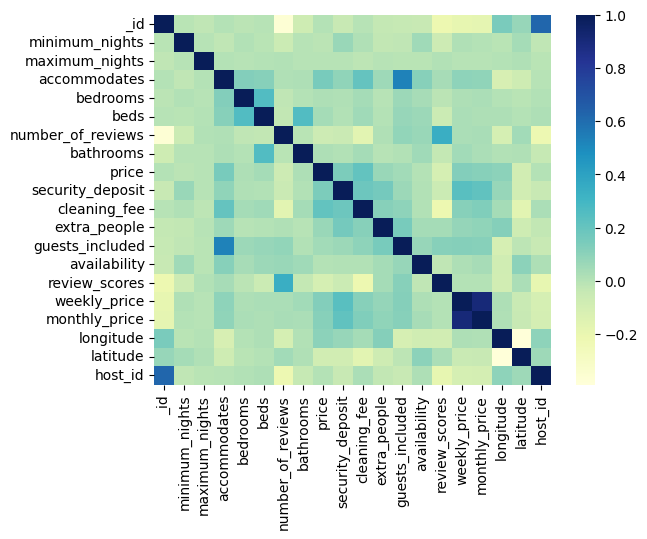

In [47]:
#let's check correlation using heatmap
newdf=df.select_dtypes(include=np.number)
fig_7 =sns.heatmap(newdf.corr(), cmap="YlGnBu", annot=False) 
plt.show()

In [44]:
#Now we have pre processed dataframe of data,Next have to make visualization Using this data 